# Data Insight: Top Factors For Startup Success

<!---
Make it simpler, emphasis what the readers gets from it
-->
#### Explore some of the key factors for startup success through this analysis. Simplifying the typical workflow of data analysis projects, this process demonstrates how valuable insights into startup acquisition can be gained, guiding entrepreneurs aiming for acquisition. ####

The dataset we will explore today is sourced from the Kaggle website. It contains information regarding industries, acquisitions, and investment details of nearly a thousand startups based in the USA spanning from the 1980s to 2013.

It's essential to understand how to transform raw data into meaningful information. To achieve this, we will follow the workflow below: 

1. Importing essential libraries
2. Load Raw Data
3. Data Exploration
4. Preprocessing 
5. Data Analysis 
6. Conclusion


**Objectives of our analysis include:**

- Compare industries with the most startup acquisitions, emphasizing the importance of industry type.
- Examine whether reaching certain milestones increases a startup's likelihood of acquisition. 
- Analyze the average total funding of startups that get acquired versus those that close.
- Evaluate if startups with Series A, B, or C funding are more likely to succeed than those backed by angel investors or VC.

<!---
Not very good phrasing
-->
But before we get into all that, let's ensure we have a common understanding about some basic concepts in the startup ecosystem.

## Understanding the Startup Ecosystem
In the startup field, there are important concepts to understand. First, startups raise money in stages called **funding rounds**, like Series A, B, or C. These rounds help them grow. Second, startups set goals called **milestones**, like launching a product or getting a certain number of users. These reflect their performance to the investors.

Finally, startups secure funding from either **angel investors** or **venture capital** firms.  Angel investors are high net worth individuals who provide personal capital for investment, whereas venture capital firms are corporate entities specializing in investing in startups.

Let’s get in to the preliminary steps. 

## Data Exploration
Data exploration serves as the first step in data analysis, involving the examination of datasets to identify patterns, detect anomalies, and verify hypotheses through summary statistics and graphical representations.

The following libraries provide the necessary tools and functions for data manipulation, analysis, and visualization.

In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import zscore

Let's import the data as a Dataframe.

In [110]:
file_path = os.path.join('..', 'saved_model', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [111]:
data_df.head(2)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.75,1,acquired


##### **Handle Irrelevant Features**

Irrelevant feature refers to a data attribute or variable that does not provide valuable or meaningful information for the task at hand. Here are some reasons why removing them is beneficial:

- Eliminating irrelevant variables simplifies the analysis process.
- It ensures focus on meaningful factors by reducing clutter and improving clarity in data exploration.

To accomplish this, we will implement the following method.

In [112]:
data_df = data_df.drop([
    'Unnamed: 0',  #Irrelevant Information
    'latitude',     #Redundant with location
    'longitude',    #Redundant with location
    'zip_code',     #Irrelevant data
    'id',           #Irrelevant data
    'Unnamed: 6',   #Irrelevant data
    'name',         #Irrelevant data
    'labels',       #Same data as status
    'state_code.1', #Repating data as state_code
    'is_CA',        #Binary column, not needed 
    'is_NY',        #Binary column, not needed
    'is_MA',        #Binary column, not needed
    'is_TX',        #Binary column, not needed
    'is_otherstate',#Binary column, not needed
    'is_software',  #Binary column, not needed
    'is_web',       #Binary column, not needed
    'is_mobile',    #Binary column, not needed
    'is_enterprise',#Binary column, not needed
    'is_advertising',#Binary column, not needed
    'is_gamesvideo',#Binary column, not needed
    'is_ecommerce', #Binary column, not needed
    'is_biotech',   #Binary column, not needed
    'is_consulting',#Binary column, not needed
    'is_othercategory',#Binary column, not needed
    'object_id'],   #Irrelevant data
    axis=1,
).copy()
data_df.head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.00,0,acquired
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.75,1,acquired


After removing irrelevant features, we've streamlined the DataFrame significantly. 
Originally starting with 50 columns, now the DataFrame has 24 columns.
After discarded meaningless variables for our analysis.
We take a quick look at the data. 

In [113]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   city                      923 non-null    object 
 2   founded_at                923 non-null    object 
 3   closed_at                 335 non-null    object 
 4   first_funding_at          923 non-null    object 
 5   last_funding_at           923 non-null    object 
 6   age_first_funding_year    923 non-null    float64
 7   age_last_funding_year     923 non-null    float64
 8   age_first_milestone_year  771 non-null    float64
 9   age_last_milestone_year   771 non-null    float64
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  category_c

A preliminary review allows us to understand the nature of the data, especially focusing on identifying key data types that will help us to make decisions.

Before starting to do any data cleaning. Let's begin with an overview of some categorical variables such as `category_code` and `status` that will help us to gain valuable insights.

To accomplish this, we will use bar chart visualizations, a method commonly used for its efficiency in presenting categorical data.

### Top 10 Sectors with High Startup Acquisition Rates

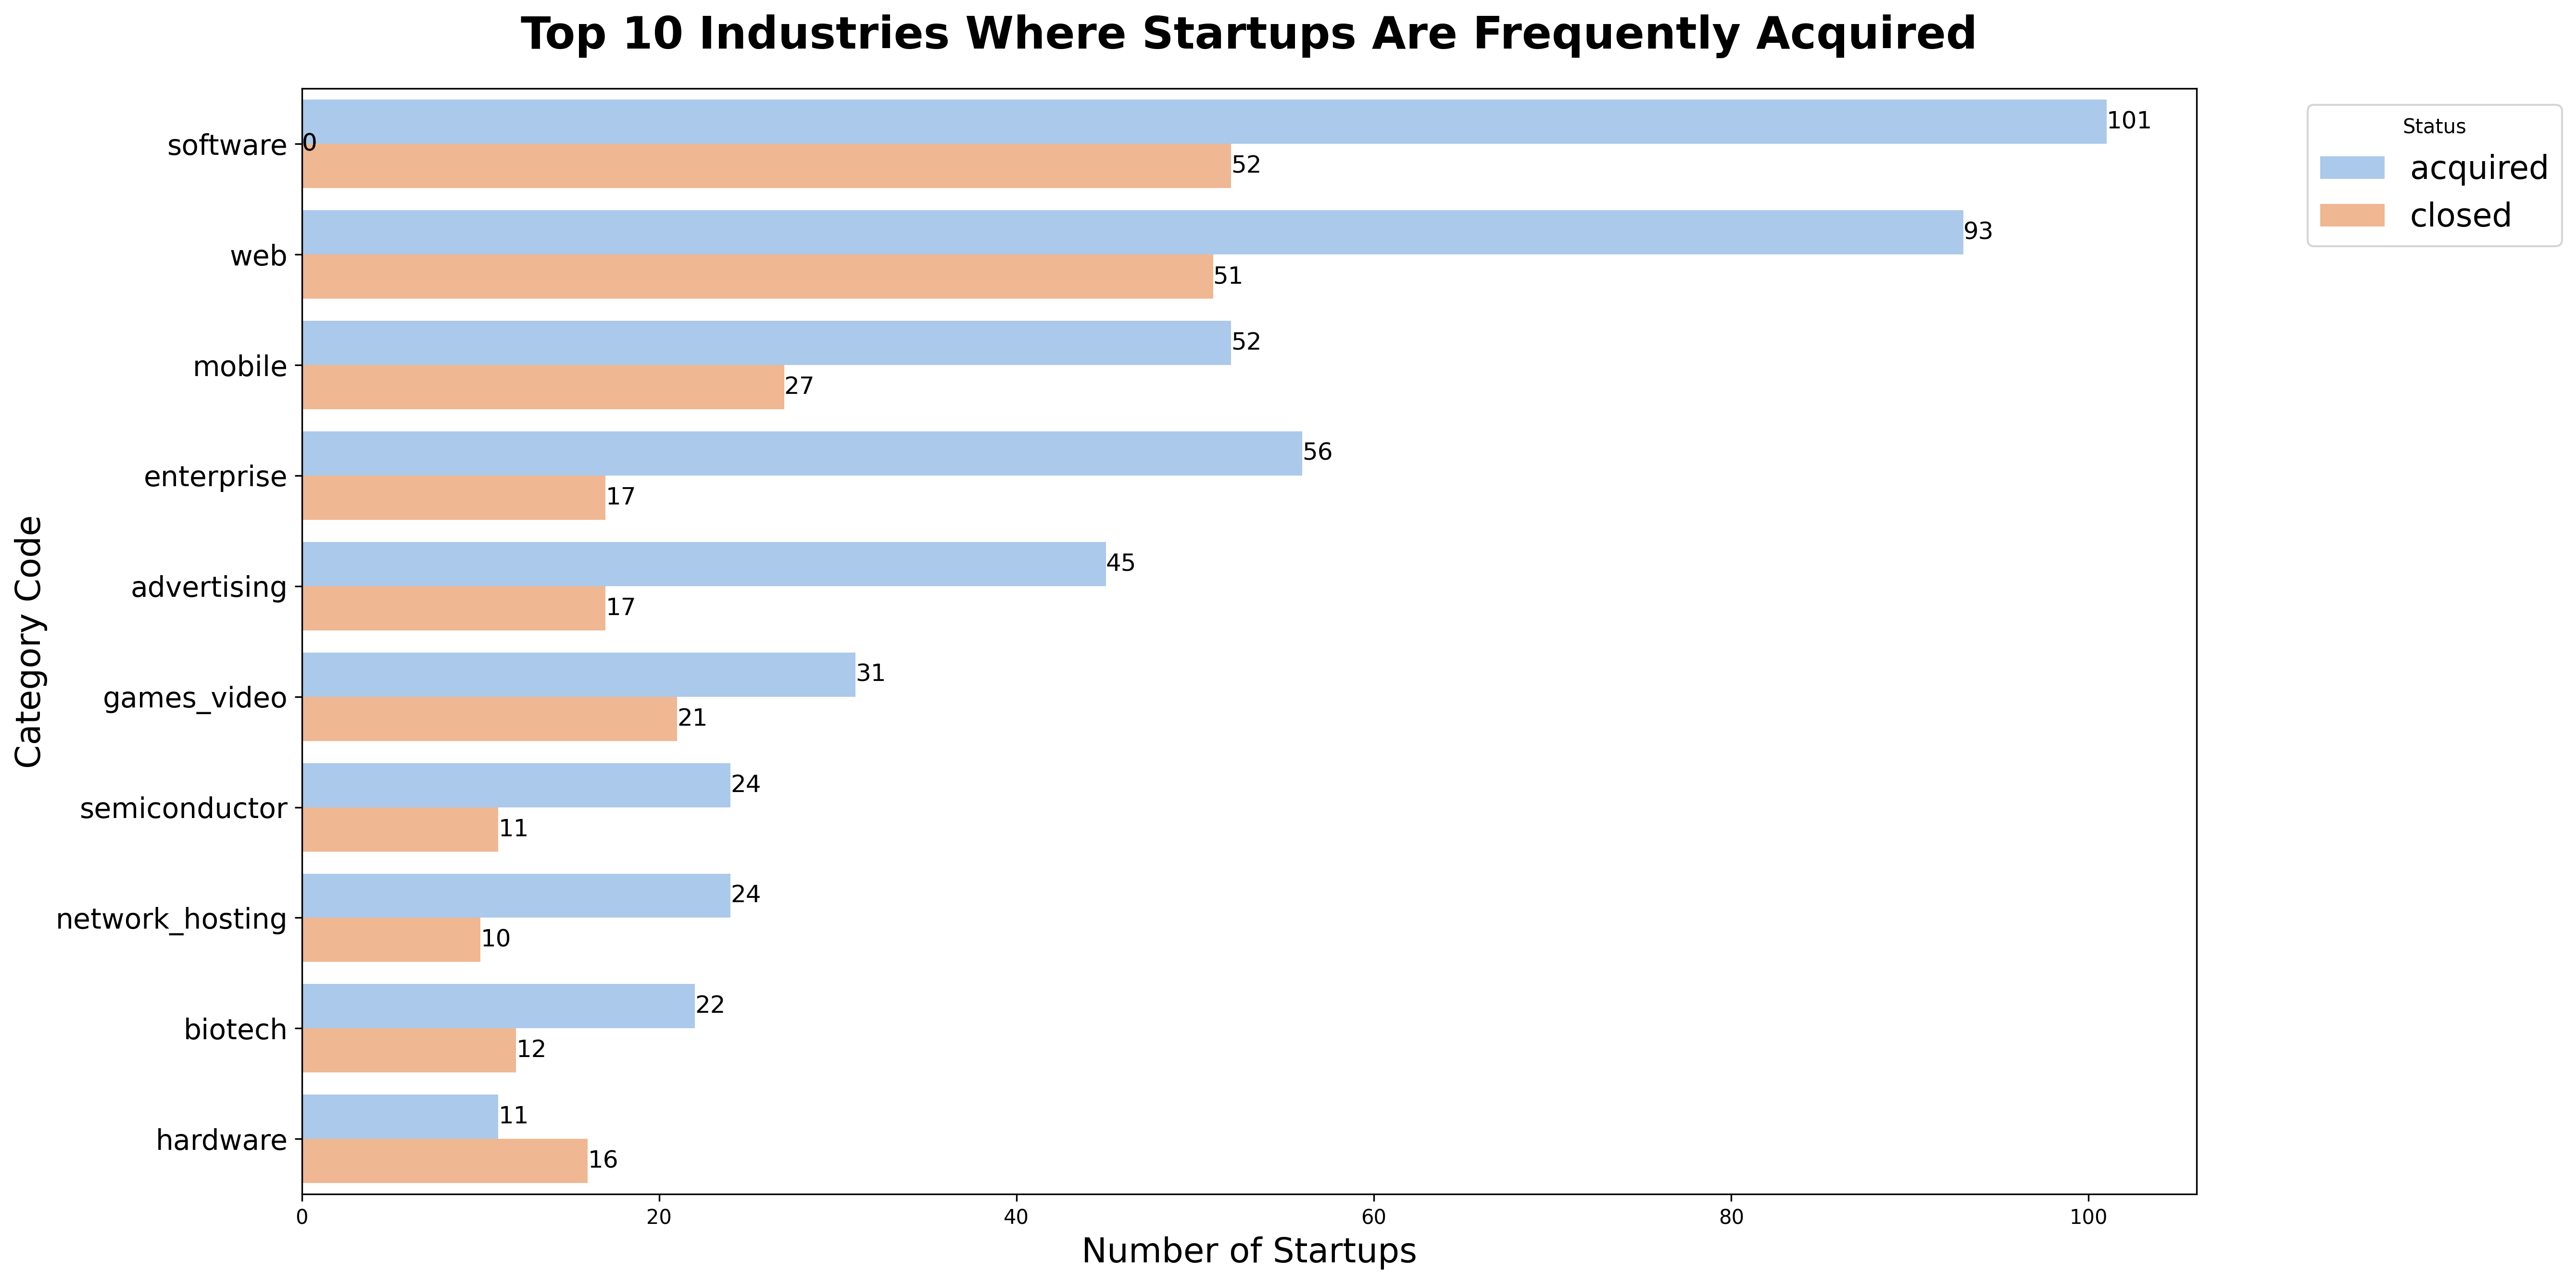

In [113]:
%matplotlib inline

# Getting the order of categories based on their frequency
# (now for y-axis since we are doing a horizontal bar plot)
order = data_df["category_code"].value_counts().index[:10]

# Create the countplot with horizontal bars
plt.figure(figsize=(18, 9), dpi=300)

# Specify the hue order explicitly
ax = sns.countplot(
    y="category_code", data=data_df, order=order, palette="pastel",
    hue='status', hue_order=['acquired', 'closed']
)

plt.title("Top 10 Industries Where Startups Are Frequently Acquired", fontsize=22, pad=20, fontweight='bold')
plt.xlabel("Number of Startups",fontsize=17)
plt.ylabel("Category Code", fontsize=17)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Set the font size of the category labels using tick_params
ax.tick_params(axis='y', labelsize=14) 

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and width of the bar
    bar_y = bar.get_y() + bar.get_height() / 2  # Y-coordinate of the center of the bar
    bar_width = bar.get_width()  # Width of the bar (count value)

    # Add text to the right end of the bar
    ax.text(bar_width, bar_y, f'{int(bar_width)}', 
            fontsize=12, color='black', ha='left', va='center')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


The software industry not only has the highest number of startups but also sees a significant portion of these ventures being acquired by larger entities. 

This trend highlights how the software industry's constant innovation and growth attracts big companies interested in new technologies or looking to grow their tech capabilities.

Similarly, the web, mobile, and enterprise sectors emerge as vibrant ecosystems, containing a substantial number of startups. 

<!---
Rephrase
-->
With this insight into the leading industries for startups, our next step is to explore time related variables. Letting us see how time influences startups trends in acquisitions.

<!---
Simplify
-->
### What year was the golden era for startups, and what does it tell us about success rates?

In order to address this question, it will be necessary to generate an additional variable named `proportions`. 

The calculation of `proportions` of startups founded each year relative to the total number of startups provides a normalized view of the data, enabling us to compare the relative frequency of startup formations over time.

In [114]:
# Convert 'founded_at' column to datetime objects
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'])

# Extract and format the year from 'founded_at' as 'founded_year'
data_df['founded_year'] = data_df['founded_at'].dt.strftime('%Y')

# Group the DataFrame by 'founded_year' and count occurrences
prop_df = data_df.groupby('founded_year').size().reset_index(name = 'counts')

# Calculate the proportions of startups founded each year
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

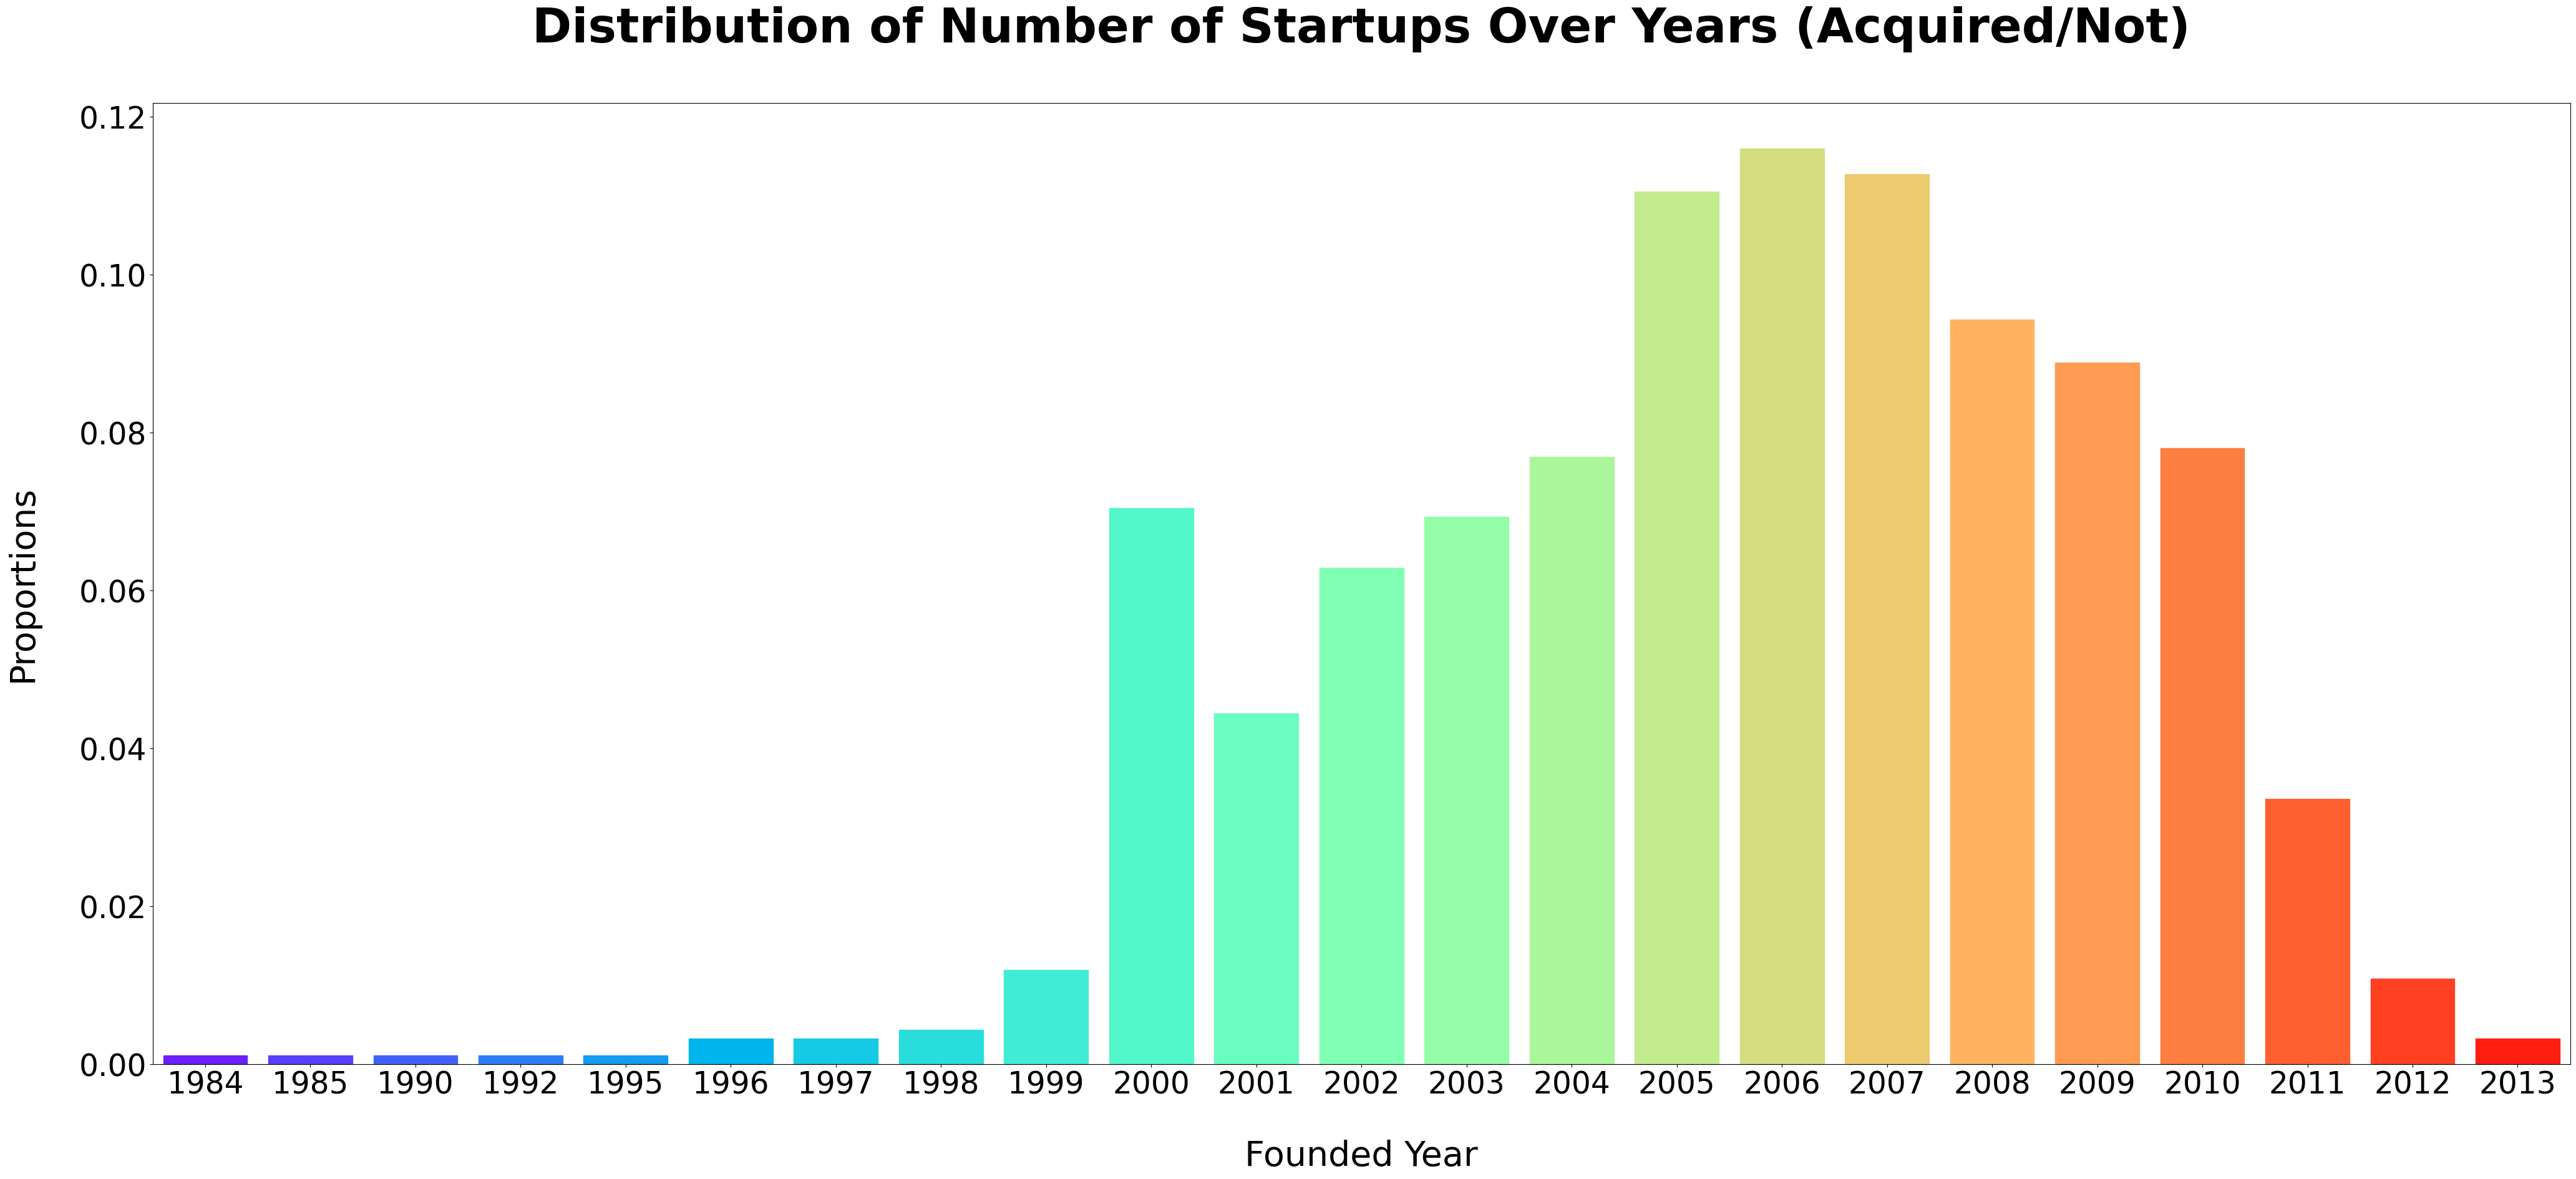

In [115]:
fig, ax = plt.subplots(figsize=(50, 20))
# Adjust the font size as needed
ax.tick_params(axis='x', labelsize=35)  

# Optionally, change the font size of the tick labels on the y-axis as well
ax.tick_params(axis='y', labelsize=35) 

ax.set_xlabel('Founded Year', fontsize=40,labelpad=45)  # Change the font size as needed
ax.set_ylabel('Proportions', fontsize=40, labelpad=45)  
# Create a barplot without a hue parameter
barplot = sns.barplot(data=prop_df, x='founded_year', y='proportions')

# Manually set colors for each bar if you want them to be different
colors = sns.color_palette("rainbow", n_colors=len(prop_df['founded_year']))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

plt.title('Distribution of Number of Startups Over Years (Acquired/Not)',fontsize=55, pad=70, fontweight='bold')
plt.show()


<!---
Add a phrase with ":"
-->
- The early 2000s marked a significant increase in the number of startups, peaking in 2007 and indicating an era of rapid growth.
  
- The rise in startup activity during this era is probably connected to the rise of the internet and digital technologies. However, after 2007, there was a decline in startup numbers, which could be attributed to market saturation, economic downturns, or shifts in investor behavior.

<!---
It is also likely that because its close to the end of the study, a lot of startup were not reported.
-->
- The decline might have sharpened after 2008, aligning with the global financial crisis, which notably impacted business investment.

<!---
Rephrase
-->
Having observed the historical trends in startup activity, with significant growth leading up to 2007 followed by a decline that might have been influenced by the global financial crisis.

Now, we aim to explore how location influences startup success.

### Comparing Startup Acquisitions and Closures in Major U.S. States

Let's proceed to create another plot that will help us identify the U.S. states with the highest rates of startup acquisitions. To comprehend these regional trends, we will present a bar chart that clearly shows where startups are most likely to succeed and get acquired.

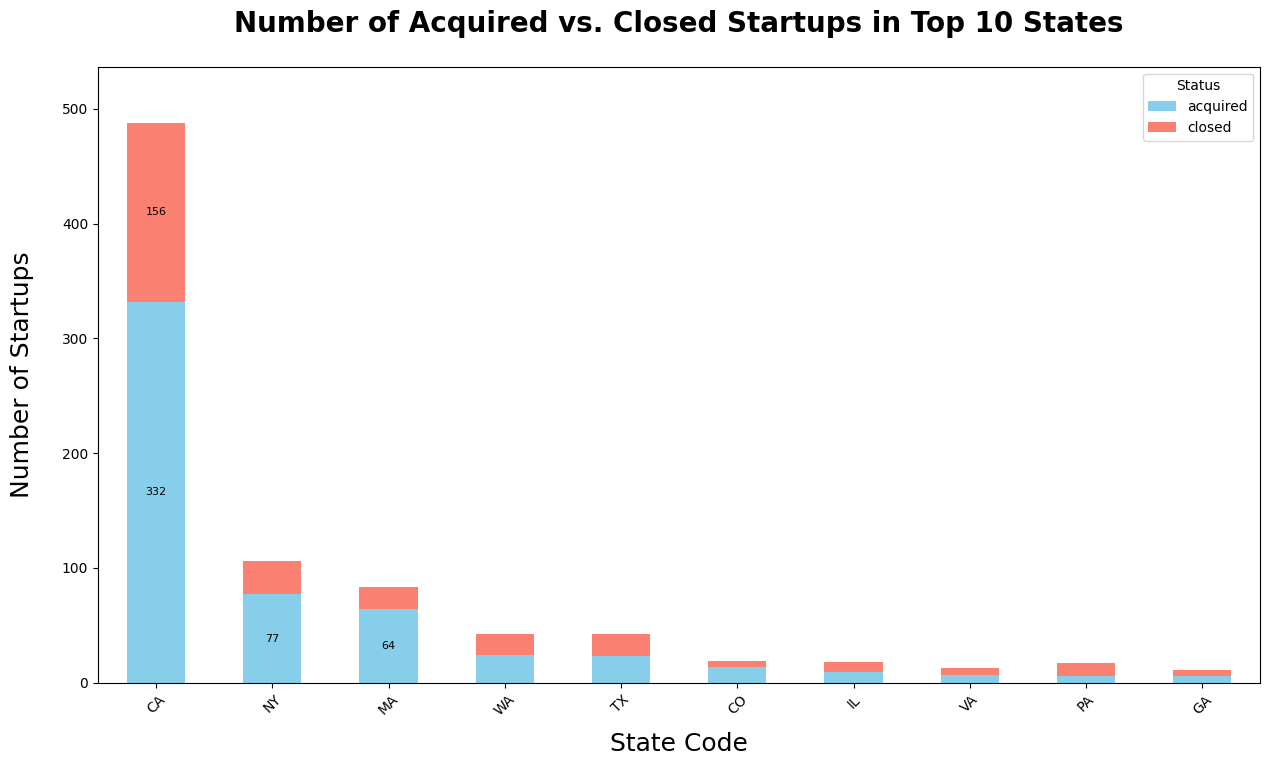

In [116]:
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it contains 'state_code' and 'status' columns
grouped_data = data_df.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(10)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States',fontsize=20, pad=25, fontweight='bold')
plt.xlabel('State Code', fontsize=18,labelpad=10)
plt.ylabel('Number of Startups', fontsize=18,labelpad=20)
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

# Define a threshold for displaying annotations
threshold = 50  # Adjust the threshold as needed

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  # Increase the y-axis limit
plt.show()

<!---
Add a phrase with ":"
-->
- California (CA) stands out with the highest total number of startups, where the number of acquired startups is more than double the number closed.

- New York (NY) and Massachusetts (MA) also exhibit a pattern where more startups are being acquired than closed, suggesting a favorable startup environment in these states as well.
  
- In other states such as Washington (WA), Texas (TX), and Colorado (CO), the numbers of acquisitions and closures are closer, pointing to a more challenging environment.

<!---
Replace until now
-->
Until now, we have recognized the role that visualizations play in comprehending data and how these techniques can uncover valuable insights. 

To get more insights from the data, we need to analyze the remaining variables. We're moving forward with the next stage.

####  **Data Preprocessing**

Preprocessing involves a comprehensive set of activities designed to clean and organize raw data. 
We'll accomplish that by applying:

**Data Cleaning,** consist on identifying and correcting data errors, such as typos, duplicates, or incorrect entries, is crucial for maintaining data integrity. We'll focus on:
  
- Handle Irrelevant Features
- Handle Missing Values 
- Handle Negative Values

**Data Transformation,** modifies data into a more analyzable format. Some of the actions use in this part:

- Normalization and Standardization: These techniques adjust data to a common scale, making it easier to compare across datasets.
- Encoding Categorical Data: Transforming categorical variables into numerical formats.


Together, these processes transform raw data into a structured, clean format, laying the groundwork for effective and accurate analysis.

#####  **Target Variable**

In our pursuit to understand factors behind a startup's success or failure, "status" variable plays a role by indicating whether a startup has been acquired or closed. This binary variable dictates the analysis direction.  

Importance of Identifying the Target Variable:
  
- **Objective Clarity:** Provides a clear goal understanding the factors driving startup acquisition.
  
- **Feature Selection:** Guides the selection of relevant factors impacting acquisition.
  
When analyzing the variable, it shows that 597 startups in our dataset were acquired, while 326 startups ended up closing down.

Next, we'll refine the 'status' column by converting 'acquired' and 'closed' categories into numeric values to facilitate analysis.

In [117]:
data_df['status'] = data_df.status.map({'acquired':1, 'closed':0})
data_df.head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.00,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.75,1,1,2000


After a thorough analysis of the data, it became apparent that certain variables contained redundant information, while others offered limited value to our analysis. One approach to tackle this is by dropping unnecessary features.

 ##### **Missing Values**

Missing values are data points in a dataset where information is simply not available or recorded for a specific attribute or variable. 

Importance of handling missing values:

- Preserve the integrity of your dataset. Without proper handling, missing values can lead to biased or misleading results in statistical analyses. 
 
- Maintain the reliability of your analyses, making them more robust and trustworthy.

In [118]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

It's important to remember that handling missing values varies based on data characteristics and analysis goals. The chosen method should be tailored to each case.

As shown above, we've identified three features that contain missing values.

Given that "age_first_milestone_year" and "age_last_milestone_year" are continuous numerical variables, our chosen imputation method will involve filling the missing values with the respective means for these variables.

**Handle missing values with Fillna() Method**

The fillna() method is utilized to address missing values, typically represented as NaN (Not a Number). 

The method provides:

- Flexibility in handling missing data by replacing NaN values with custom alternatives, like specific numbers, text, or computed values.


This is a simple and easily applicable method. By incorporating values centered around the data's central tendency, it retains the original distribution. It's especially well suited for continuous numerical variables. 


In [119]:
data_df["age_first_milestone_year"] = data_df["age_first_milestone_year"].fillna(data_df["age_first_milestone_year"].mean())
data_df["age_last_milestone_year"] = data_df["age_last_milestone_year"].fillna(data_df["age_last_milestone_year"].mean())

In [120]:
data= data_df.isnull().sum()
data.sort_values(ascending=False)

closed_at                   588
state_code                    0
milestones                    0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
category_code                 0
funding_total_usd             0
city                          0
funding_rounds                0
relationships                 0
age_last_milestone_year       0
age_first_milestone_year      0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

**General Changes:**

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
  
- Missing values in 'closed_at' represent startups that are still open and will not be filled for now. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date. 
  
Now that we've established the significance of handling missing values, let's proceed with the next step.

##### **Negative values**

Negative values, typically less than zero, can be crucial for example in case of financial data, indicating debt or losses, pivotal for evaluating a company's health. In other contexts, negative numbers might signify errors or necessitate data adjustments.

Importantly, these values can sometimes offer valuable insights; removing them without careful consideration could result in missing critical information. 

Before we continue, we will convert the following columns into datetime format to ensure that they are suitable for time based analysis.

In [121]:
data_df.founded_at=pd.to_datetime(data_df.founded_at)
data_df.first_funding_at=pd.to_datetime(data_df.first_funding_at)
data_df.last_funding_at=pd.to_datetime(data_df.last_funding_at)

To detect negative values, we will utilize a commonly used tool for initial data exploration: Box plots. These help quickly identify and address negative values that may indicate data entry errors or other anomalies.

According to our data set, most of the features are binary which are not suitable for negative values detection, therefore we will consider only the following continuous variables.

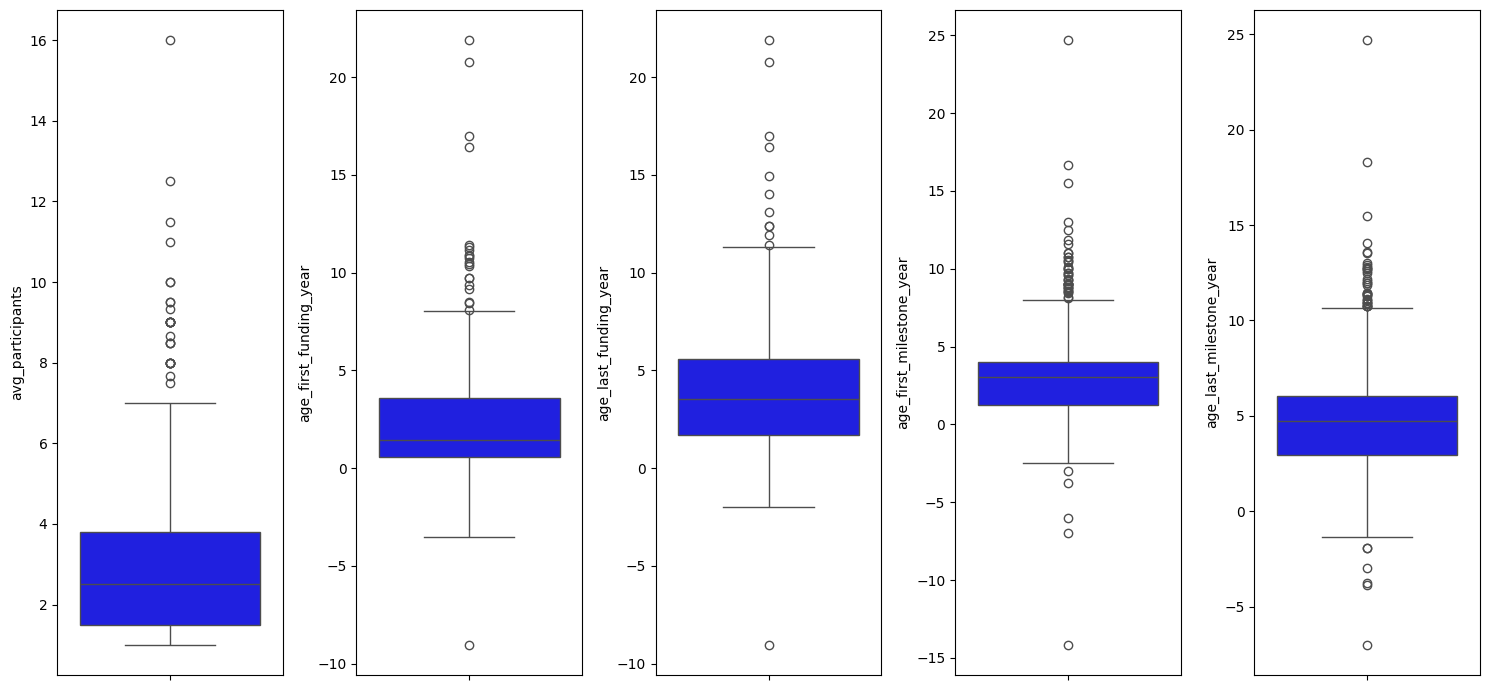

In [122]:
featuresNumfinal = ['avg_participants','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data_df[featuresNumfinal[i]], color='blue', orient='v')
    plt.tight_layout()

From the box plots, we can derive the following insights:

- The points that appear outside the main body of the box plot represent values that are outside the typical range of the dataset. 

- The points that are below the lower whisker of the box plots indicate that they are negative values, as seen in box plots 2, 3, 4, and 5.

- The points lying above the upper whisker represent the positive outliers. We will address these in a later stage of our analysis.

Let's explore another visualization that will help us clearly identify negative values within our dataset.

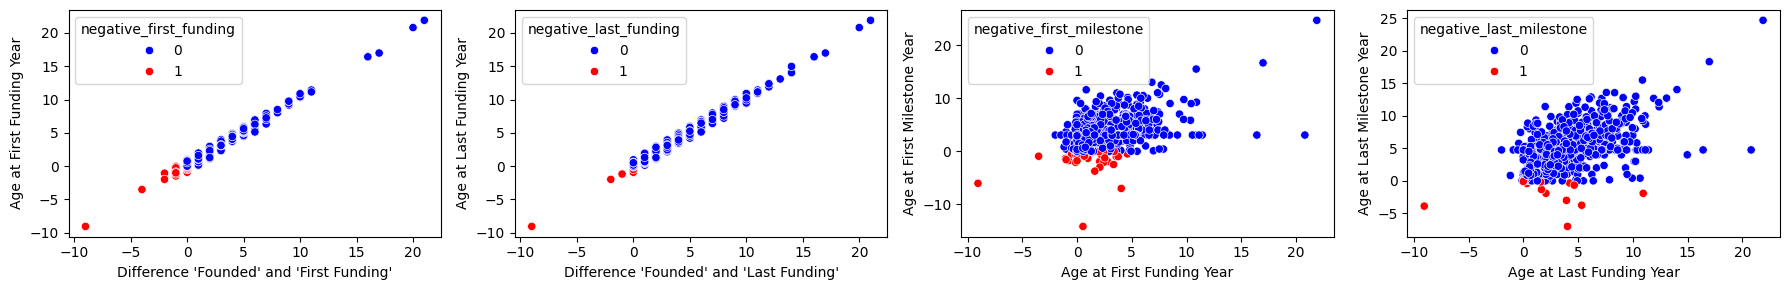

In [123]:
# Define a custom color palette for negative and non-negative values
custom_palette = {0: "blue", 1: "red"}

# Create new columns to identify negative values for first and last funding and milestone years
data_df['negative_first_funding'] = (data_df["age_first_funding_year"] < 0).astype(int)
data_df['negative_last_funding'] = (data_df["age_last_funding_year"] < 0).astype(int)
data_df['negative_first_milestone'] = (data_df["age_first_milestone_year"] < 0).astype(int)
data_df['negative_last_milestone'] = (data_df["age_last_milestone_year"] < 0).astype(int)

plt.figure(figsize=(18, 3), dpi=100)

# First subplot for 'age_first_funding_year'
plt.subplot(1, 4, 1)
sns.scatterplot(
    x=data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year, 
    y=data_df["age_first_funding_year"],
    hue=data_df["negative_first_funding"], 
    palette=custom_palette
)
plt.xlabel("Difference 'Founded' and 'First Funding'")
plt.ylabel("Age at First Funding Year")

# Second subplot for 'age_last_funding_year'
plt.subplot(1, 4, 2)
sns.scatterplot(
    x=data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year, 
    y=data_df["age_last_funding_year"],
    hue=data_df["negative_last_funding"], 
    palette=custom_palette
)
plt.xlabel("Difference 'Founded' and 'Last Funding'")
plt.ylabel("Age at Last Funding Year")

# Third subplot for 'age_first_milestone_year'
plt.subplot(1, 4, 3)
sns.scatterplot(
    x=data_df["age_first_funding_year"], 
    y=data_df["age_first_milestone_year"],
    hue=data_df["negative_first_milestone"], 
    palette=custom_palette
)
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot for 'age_last_milestone_year'
plt.subplot(1, 4, 4)
sns.scatterplot(
    x=data_df["age_last_funding_year"], 
    y=data_df["age_last_milestone_year"],
    hue=data_df["negative_last_milestone"], 
    palette=custom_palette
)
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()


In the visual representations, negative values are highlighted in red, while positive values are indicated in blue.

The occurrence of negative values could be attributed to several reasons, such a data entry errors, or a relative timing. However, without definitive context, we cannot be certain of the exact cause.

For the purposes of our analysis, we'll focus on how to handle these negative values. By doing so, we can maintain the integrity of our analysis and ensure that our insights are based on accurate and representative data.

Let's proceed with an analysis to determine if any specific column contains negative values.

In [124]:
age_columns = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in age_columns:
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: True
Negative values in 'age_last_funding_year' column: True
Negative values in 'age_first_milestone_year' column: True
Negative values in 'age_last_milestone_year' column: True


To address the negative values, we will employ the following function:

**Handle Negative values with Function np.abs()**

This function is a valuable tool in data manipulation and numerical analysis for quickly and reliably obtaining absolute values.

By taking the absolute values (converting them to positive values), you remove the negative sign and focus on the magnitude or distance from zero. 

In [125]:
data_df["age_first_funding_year"]=np.abs(data_df["age_first_funding_year"])
data_df["age_last_funding_year"]=np.abs(data_df["age_last_funding_year"])
data_df["age_first_milestone_year"]=np.abs(data_df["age_first_milestone_year"])
data_df["age_last_milestone_year"]=np.abs(data_df["age_last_milestone_year"])

In [126]:
age_columns = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in age_columns:
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: False
Negative values in 'age_last_funding_year' column: False
Negative values in 'age_first_milestone_year' column: False
Negative values in 'age_last_milestone_year' column: False


 In outlier detection or anomaly detection tasks, absolute values can help identify extreme deviations regardless of their direction.

Now, let's revisit our plot to observe the changes that occurred after the removal of negative values.

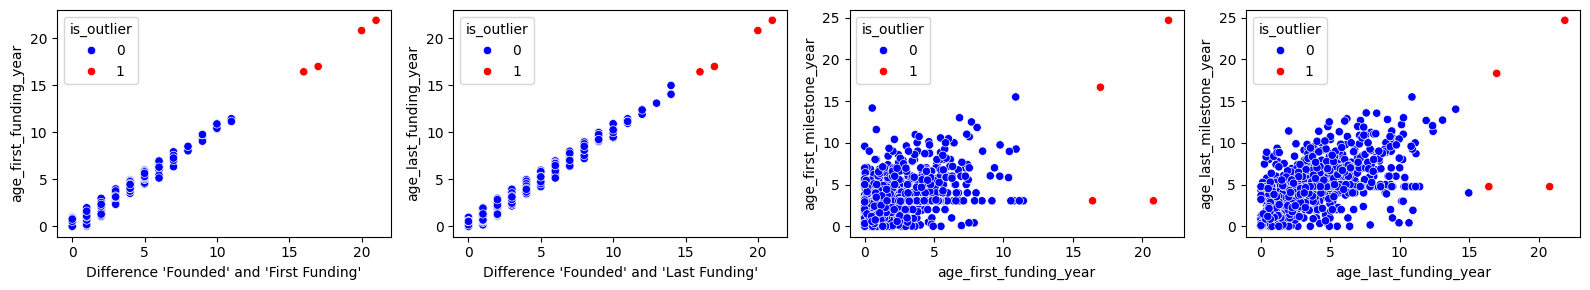

In [127]:
def identify_outliers(column):
    threshold = 4  # Example threshold
    mean = column.mean()
    std = column.std()
    is_outlier = (np.abs(column - mean) > threshold * std)
    return is_outlier.astype(int)

# Apply outlier identification for a specific column as an example
data_df['is_outlier'] = identify_outliers(data_df["age_first_funding_year"])

# Define a custom color palette
custom_palette = {0: "blue", 1: "red"}

plt.figure(figsize=(16, 3), dpi=100)

# Adjusting the plots to use 'is_outlier' for hue
# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_first_funding_year"], hue=data_df["is_outlier"], palette=custom_palette)
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_last_funding_year"], hue=data_df["is_outlier"], palette=custom_palette)
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"], hue=data_df["is_outlier"], palette=custom_palette)

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"], hue=data_df["is_outlier"], palette=custom_palette)

plt.tight_layout()  # Adjust the layout
plt.show()


The outcome was a cleaner dataset, with all negative values successfully removed.

 This time we turn our attention to the positive outliers (red points) highlighted through the z-score method in our visualization, later on we will explain it. 
 
 Let's proceed to analyze these outliers in detail.

 ##### **Outliers**

Outliers are data points that significantly deviate from the main group of values in a dataset. These extreme values can distort statistical analyses and impact the reliability of our findings.

We will delve into two methods to identify them:

- Employing visual inspection with tools such as scatter plots and histograms to observe data distribution and spot anomalies.
  
- Utilizing statistical methods, including the calculation of Z-scores and application of the interquartile range (IQR), to quantitatively detect outliers.

**Identifying Outliers with Histogram**

A histogram displays the distribution of numerical data using adjacent bars, with each bar's height representing the frequency of data points within a specific interval or bin.

By closely examining the histogram, we can spot any data points that fall far outside the typical range of values. These outliers often appear as isolated bars or spikes on the histogram, indicating their deviation from the majority of the data.

Let's determine which variables have the highest number of outliers.

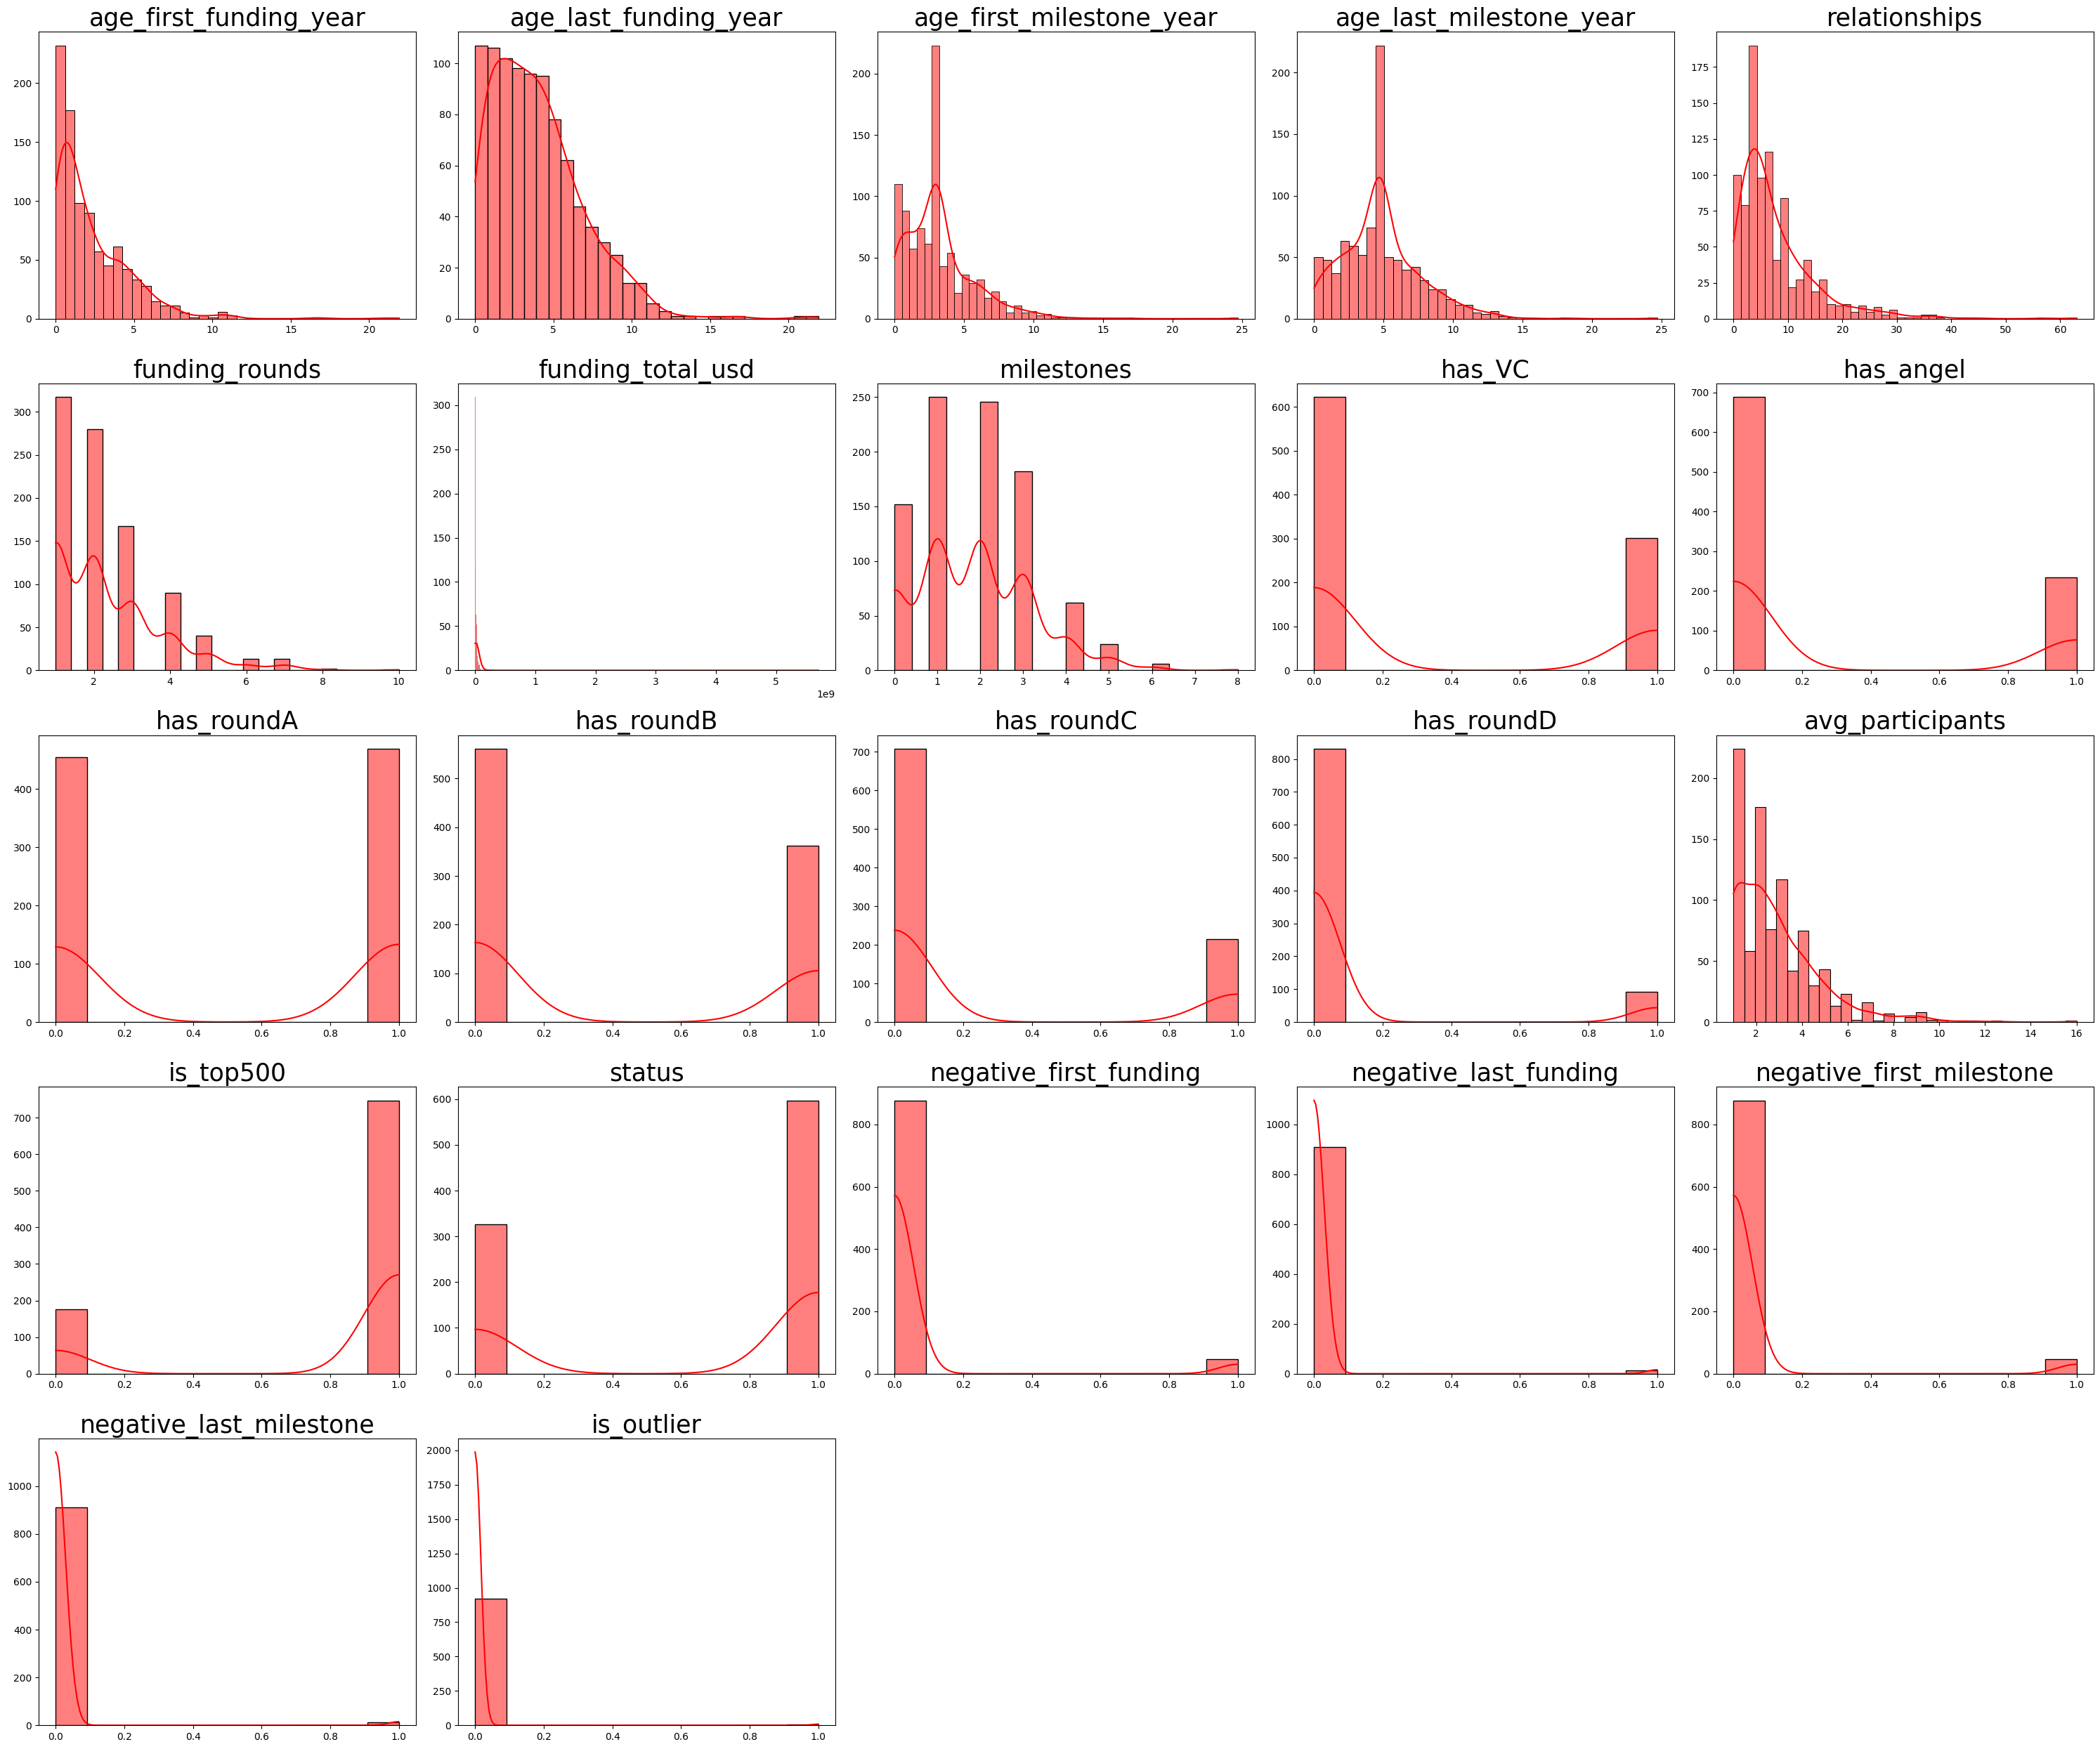

In [128]:
# Select only numeric columns for histogram plots
numeric_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_variables = len(numeric_columns)
num_columns = 5  # You can choose how many columns you want per row
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size to give each subplot a little more room
fig_width = num_columns * 6  # 5 inches per subplot column
fig_height = num_rows * 5    # 4 inches per subplot row

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(data_df[column], color="red", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  # Remove x labels to prevent clutter
    plt.ylabel('')  # Remove y labels to prevent clutter

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As observed in the histogram, noticeable spikes are apparent in the data. Excluding binary variables, the variables with the most prominent spikes are:

- 'age_first_funding_year', 
- 'age_first_milestone_year',
- 'age_last_milestone_year'
- 'relationships' 

Lets now determinate how much our dataset is affected by unusual data points. To do that we will use the following function.

**Identifying Outliers with Function z-score**

Z-scores help us see how different a data point is from the average (mean) of the dataset. We will apply this method to one of the columns that has a higher number of outliers.("age_first_milestone_year").

In [129]:
zscores=zscore(data_df["age_first_milestone_year"])
for threshold in range(1,6,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))

Threshold value: 1
Number of outliers: 135
Threshold value: 2
Number of outliers: 40
Threshold value: 3
Number of outliers: 10
Threshold value: 4
Number of outliers: 4
Threshold value: 5
Number of outliers: 2


**Interpretation** 

- Lower z-score thresholds broaden the range for outlier detection, resulting in the identification of more outliers.
- Higher z-score thresholds narrow down the range, leading to the detection of fewer outliers.
- Adjusting the z-score threshold allows for fine-tuning outlier detection sensitivity based on specific requirements or preferences.

The z-score analysis for the 'age_first_milestone_year' column indicates that adjusting the threshold affects the number of outliers found.

Now that we have identify outliers in our data, the next step is to apply log transformation to helps to normalize it. To do that we will use The log-transformed method.

**Handle Outliers with log-transformed method**

The log-transformed method involves taking the natural logarithm (ln) of each data point in a dataset. It's useful when data has a wide range of values, helping to balance and spread out the data.

The following graph illustrates the dataset before and after applying log transformation.

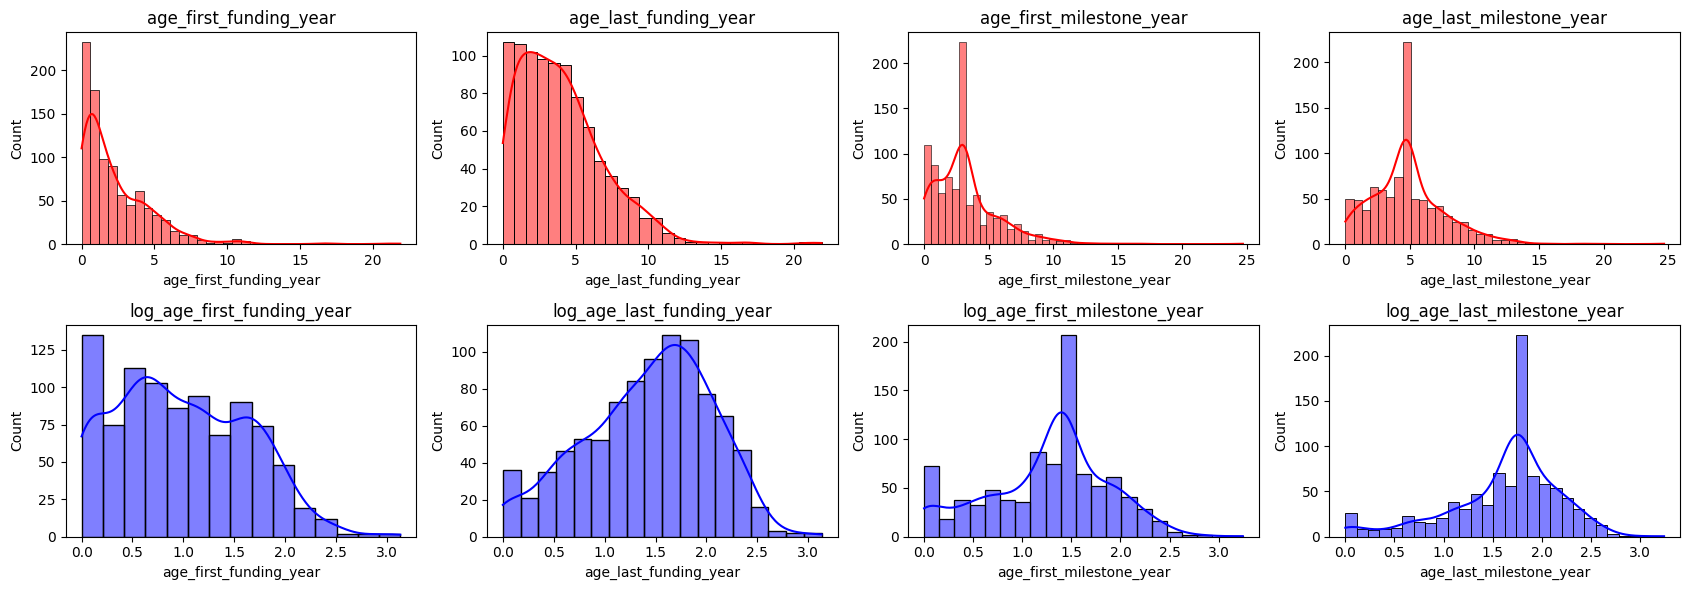

In [130]:
variables = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(variables):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_df[variable], color="red", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(data_df[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="blue", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

The distinction is evident; in the blue histogram, the peak is noticeably lower than in the red histogram.

 When you use the logarithm on data, compresses the outliers closer to the rest of the values. This makes the distribution of the data look more like a balanced and symmetrical shape, similar to a bell curve. 
 - It's important to note that log transformation doesn't remove outliers entirely; it reduces their impact.
  
After addressing negative values and outliers, our goal is to uncover correlations among all the available features. To achieve this, we will concentrate on the next step of data transformation. 


Lets quickly inspect the first few rows of your DataFrame after sorting by index. 

In [131]:
data_df.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_roundD,avg_participants,is_top500,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1.00,0,1,2007,0,0,0,0,0
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,4.75,1,1,2000,0,0,0,0,0


Before converting the data In order to better analyze and understand the startup dataset, we will take several data preparation steps.

In [132]:
data_df = data_df

#We convert the 'closed_at' column to datetime format, handling any conversion errors. 
data_df['closed_at'] = pd.to_datetime(data_df['closed_at'], errors='coerce')

#Sort DataFrame by 'closed_at' in descending order revealing the most recent startup closures.
data_df = data_df.sort_values(by='closed_at', ascending=False )

#Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]

#Confirm is the right value
print("Last startup closing date:", last_closed_date)

#temporary variable, 'closed_temp,' is created to preserve non-null values of the 'closed_at' column for calculations.
closed_temp = data_df['closed_at'].copy()

#Fill the null values in 'closed_temp' with the last closed date(2013-10-30)
closed_temp.fillna(last_closed_date, inplace=True)

#Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

#Missing values in 'closed_at' are replaced with 'x' to signify operating startups.
data_df['closed_at'] = data_df['closed_at'].fillna(value="x")

#'closed_at' values are converted to binary: 1 for 'x' (still operating) and 0 otherwise.
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)

Last startup closing date: 2013-10-30 00:00:00


These operations serve the primary purpose of preparing and refining the dataset to facilitate subsequent analysis and reporting.

In [133]:
data_df.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,avg_participants,is_top500,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1.00,0,1,2007,0,0,0,0,0,6.8282
1,CA,Los Gatos,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,4.75,1,1,2000,0,0,0,0,0,13.8289


**Converting Categorical features to Numerical values**


Utilizing numerical data over categorical data offers numerous advantages in data analysis:

- Enables a wider range of statistical analyses.
- Simplifies correlation calculations between variables.
- Compatible with diverse visualization methods like scatter plots, histograms, and heatmaps.
  
To convert our features, we'll employ the custom mapping technique. Let's explore the process.

**Mapping Technique**

In [134]:
# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code','founded_year']
# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'NY': 1, 'MI': 2, 'IL': 3, 'NJ': 4, 'OH': 5, 'DC': 6, 'TX': 7, 'CT': 8, 'WA': 9, 'PA': 10, 'MA': 11, 'TN': 12, 'ME': 13, 'ID': 14, 'VA': 15, 'MN': 16, 'NC': 17, 'GA': 18, 'CO': 19, 'FL': 20, 'MD': 21, 'WI': 22, 'AR': 23, 'IN': 24, 'UT': 25, 'AZ': 26, 'KY': 27, 'NM': 28, 'NH': 29, 'RI': 30, 'OR': 31, 'NV': 32, 'MO': 33, 'WV': 34}, 'city': {'Mountain View': 0, 'San Diego': 1, 'New York': 2, 'San Francisco': 3, 'Bingham Farms': 4, 'Chicago': 5, 'Hillsborough': 6, 'Cincinnati': 7, 'Yorba Linda': 8, 'San Jose': 9, 'Fremont': 10, 'Washington': 11, 'Austin': 12, 'Westport': 13, 'Seattle': 14, 'Philadelphia': 15, 'Evanston': 16, 'Champaign': 17, 'Pittsburgh': 18, 'NYC': 19, 'Waltham': 20, 'San Mateo': 21, 'Palo Alto': 22, 'Memphis': 23, 'South San Francisco': 24, 'West Newfield': 25, 'Beverly Hills': 26, 'NY': 27, 'Idaho Falls': 28, 'Burlington': 29, 'Viena': 30, 'Red Bank': 31, 'Toledo': 32, 'Andover': 33, 'Saint Paul': 34, 'Boston': 35, 'Cambridge': 36, 'Canton': 37,

This technique involves two essential steps:

- Identifying and distinguishing unique categories within each column.
- Establishing mappings to allocate a distinct integer to each category.
  
By using this method, we can maximize the advantages of numerical data, enriching our data analysis.

In [135]:
# Assuming data_df is your DataFrame

# Set a reference date. You could choose the earliest date in your dataset or a specific date.
reference_date = data_df[['founded_at', 'first_funding_at', 'last_funding_at']].min().min()

# Convert 'founded_at', 'first_funding_at', and 'last_funding_at' into days since the reference date
data_df['founded_at_days'] = (data_df['founded_at'] - reference_date).dt.days
data_df['first_funding_at_days'] = (data_df['first_funding_at'] - reference_date).dt.days
data_df['last_funding_at_days'] = (data_df['last_funding_at'] - reference_date).dt.days

# Now, 'founded_at_days', 'first_funding_at_days', and 'last_funding_at_days' are numerical columns representing the number of days from the reference date.
# 'closed_at' remains unchanged as it is already in numerical format (int64).

# Optionally, you might drop the original datetime columns if they're not needed anymore.
data_df.drop(['founded_at', 'first_funding_at', 'last_funding_at'], axis=1, inplace=True)


The code converts date columns ('founded_at', 'first_funding_at', 'last_funding_at') into numerical representation of days since the reference date. This transformation allows for easier computation and analysis based on temporal factors. 

The techniques for converting categorical data into numerical data will always be chosen based on the nature of the categorical data (nominal or ordinal), and the specific requirements of the analysis. 

The goal is always to preserve and highlight the inherent characteristics of the data while making it more amenable to analysis.

Now that we've transformed the variables, we can explore their connections, allowing for a more in depth analysis.

####  **Will Not be Include (Changes for modeling)**

Additionally, by dropping the original datetime columns, the DataFrame becomes more concise and efficient for subsequent modeling tasks.

In [136]:
data_df.sort_index().head(2)

,state_code,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_at_days,first_funding_at_days,last_funding_at_days
0,0,1,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,1,0,0,0,0,0,6.8282,8401,9222,9497
1,0,61,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,9,0,0,0,0,0,13.8289,5844,7715,9493


In [137]:
data_df = data_df.drop(['closed_at'], axis=1).copy()
data_df.head(2)

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_at_days,first_funding_at_days,last_funding_at_days
609,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,3,...,0,1,0,0,0,0,4.2601,9339,9283,10194
633,0,1,0.2164,4.8438,0.2164,6.2466,22,5,70000000,5,...,1,0,0,0,0,0,6.2916,8582,8661,10350


In [138]:
data_df = data_df.drop(['age'], axis=1).copy()
data_df.head(2)

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,founded_at_days,first_funding_at_days,last_funding_at_days
609,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,3,...,0,0,1,0,0,0,0,9339,9283,10194
633,0,1,0.2164,4.8438,0.2164,6.2466,22,5,70000000,5,...,0,1,0,0,0,0,0,8582,8661,10350


In [139]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (29):
['state_code', 'city', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'founded_year', 'negative_first_funding', 'negative_last_funding', 'negative_first_milestone', 'negative_last_milestone', 'is_outlier', 'founded_at_days', 'first_funding_at_days', 'last_funding_at_days']

Categorical Features (0):
[]

Datetime Features (0):
[]

Target Variable (1):
['status']


In [140]:
data_df.to_csv('cleaned_data.csv', index=False) 

####  **Data Analysis** 

We aim to comprehend the factors influencing whether a startup is acquired. To achieve this, we will utilize the Heatmap visualization.

Benefits of using heatmaps : 

- **Visual Insights:** Heatmaps provide a visual way to understand data relationships quickly.

- **Feature Selection:** They help identify important variables by highlighting correlations.


**Factors correlated with startup acquisitions**

We will generate a plot to compare two correlation methods, Pearson's and Spearman, selecting just the features with the highest absolute correlation values with 'status.' of the startup.

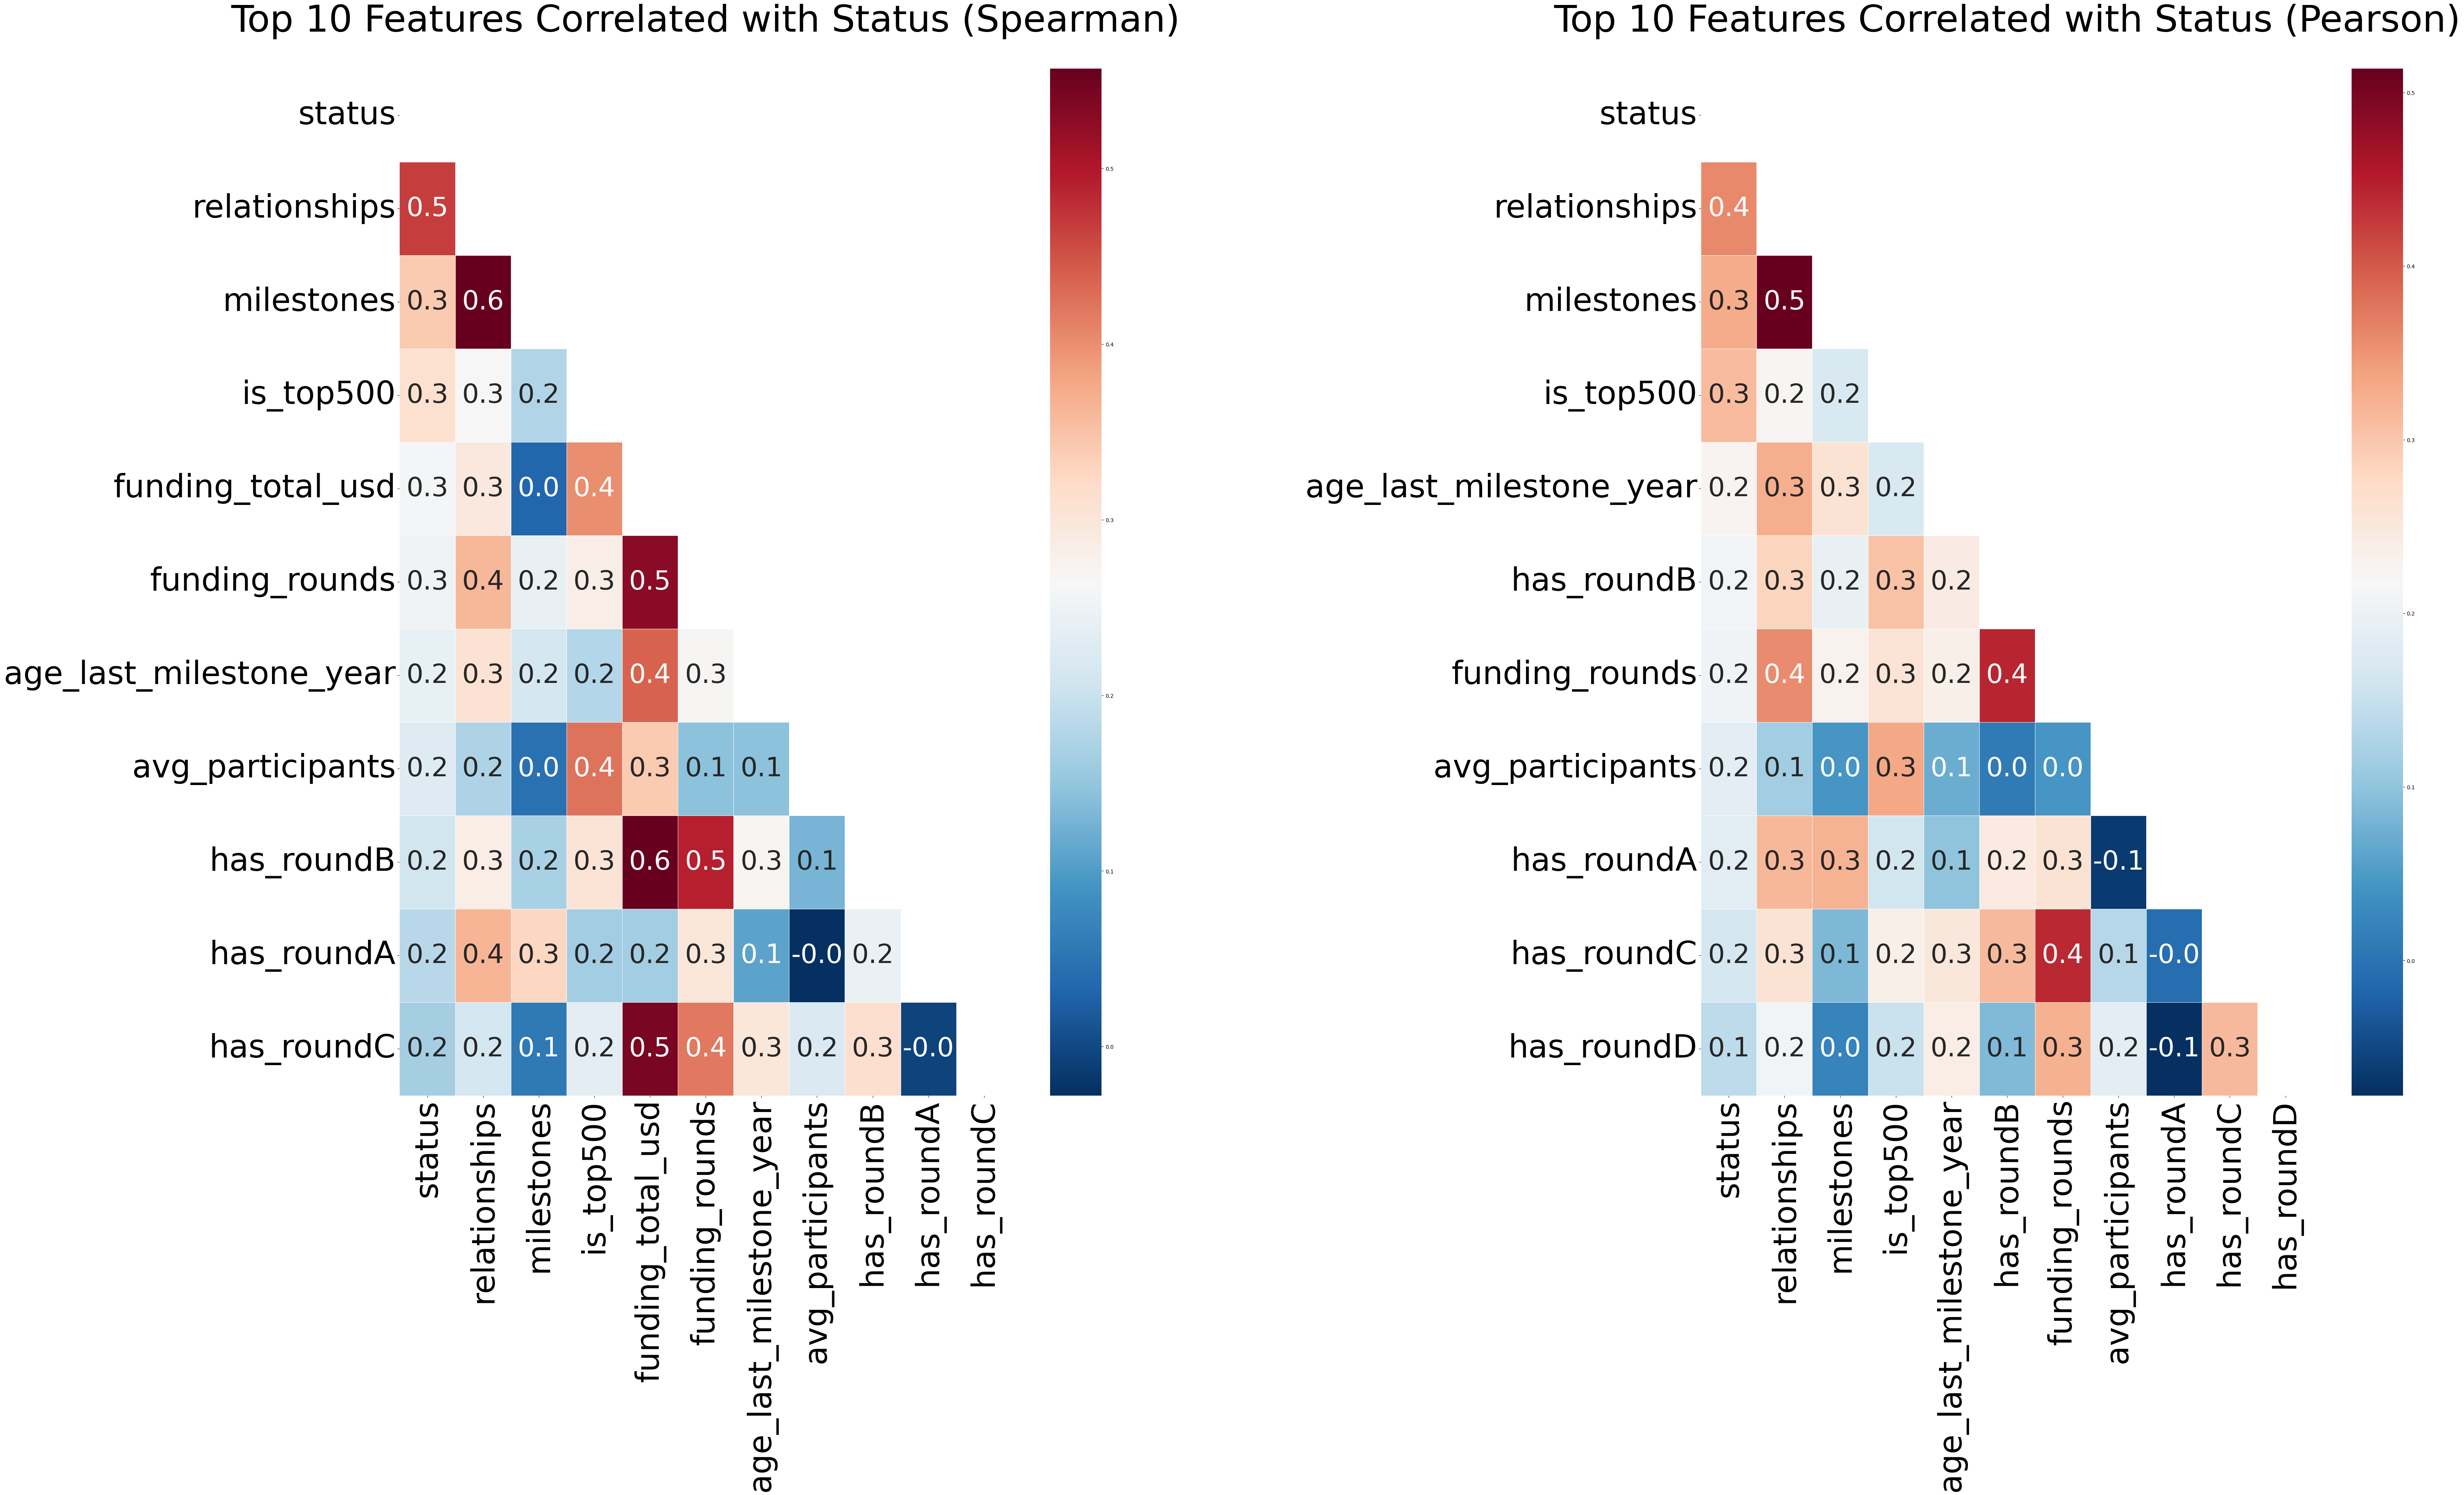

In [141]:
def draw_heatmaps_side_by_side(data_df):
    # Calculate the Spearman correlation matrix and select the top 10 correlated features
    spearman_corr = data_df.corr(method='spearman')
    top_10_features_spearman = spearman_corr['status'].abs().sort_values(ascending=False).head(11).index
    top_spearman_corr = spearman_corr.loc[top_10_features_spearman, top_10_features_spearman]
    
    # Calculate the Pearson correlation matrix and select the top 10 correlated features
    pearson_corr = data_df.corr(method='pearson')
    top_10_features_pearson = pearson_corr['status'].abs().sort_values(ascending=False).head(11).index
    top_pearson_corr = pearson_corr.loc[top_10_features_pearson, top_10_features_pearson]
    
    # Create a figure with 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (70, 35)) # Adjust size as needed
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    # Create a mask for the Spearman heatmap
    mask_spearman = np.triu(np.ones_like(top_spearman_corr, dtype=bool))
    
    # Draw the Spearman correlation heatmap for the top 10 features
    sns.heatmap(top_spearman_corr, annot=True, annot_kws={"size": 50}, linewidths=0.5, fmt='.1f', ax=ax1, cmap=cmap, mask=mask_spearman)
    ax1.set_title('Top 10 Features Correlated with Status (Spearman)', fontsize=70, pad=70)
    ax1.tick_params(axis='both', which='major', labelsize=30)  # Set the size of the axis labels

    # Explicitly set the tick labels to remain horizontal
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=60, rotation=90)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=60, rotation=0)
    
    # Create a mask for the Pearson heatmap
    mask_pearson = np.triu(np.ones_like(top_pearson_corr, dtype=bool))
    
    # Draw the Pearson correlation heatmap for the top 10 features
    sns.heatmap(top_pearson_corr, annot=True, annot_kws={"size": 50}, linewidths=0.5, fmt='.1f', ax=ax2, cmap=cmap, mask=mask_pearson)
    ax2.set_title('Top 10 Features Correlated with Status (Pearson)', fontsize=70, pad=70)
    ax2.tick_params(axis='both', which='major', labelsize=30)  # Set the size of the axis labels

    # Explicitly set the tick labels to remain horizontal
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=60, rotation=90)
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=60, rotation=0)
    
    plt.subplots_adjust(wspace=0.7)
    
    # Display the figure with both heatmaps
    plt.show()

# Assuming 'data_df' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime64']
numerical_df_1 = data_df.select_dtypes(include=numerics)

draw_heatmaps_side_by_side(numerical_df_1)

Based on the provided heatmaps, which compare the Spearman and Pearson correlation coefficients for various features with the 'status' of startups, we can draw several conclusions relevant to predicting startup success:
  
- These features consistently show a positive correlation in both methods, implying that the number of business relationships and milestones achieved, as well as the number of funding rounds, are potentially important indicators of startup success.

Now that we have established their relationship, let's address each variable and proceed to explore the following key questions:

 ##### **Does the number of milestones achieved impact a startup's chance of getting acquired?**

In [142]:
# Group your data by milestones and status and count the occurrences
grouped = data_df.groupby(["milestones", "status"]).size().reset_index(name="count")
grouped.columns = ["source", "target", "value"]
grouped['target'] = grouped['target'].map({0: 'closed', 1: 'acquired'})
grouped['source'] = grouped.source.map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 8: '8'})
links = pd.concat([grouped], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

# Convert links DataFrame to dictionary
links_dict = links.to_dict(orient='list')

# Apply the color map to the links
# Directly use the 'acquired' and 'closed' labels to determine the color
link_colors = ['rgba(144, 238, 144, 0.5)' if target == 'acquired' else 'rgba(255, 0, 0, 0.5)' for target in grouped['target']]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_source_target,
        color="white"
    ),
    link=dict(
        source=links_dict["source"],
        target=links_dict["target"],
        value=links_dict["value"],
        color=link_colors  # Apply the colors to the links
    )
)])

fig.update_layout(
    annotations=[
        dict(
            x=0.5,  # Set x to 0.5 for centering horizontally
            y=1.20,  # Adjust y as needed 
            text="Analyzing the Correlation: Milestones Achievement vs Startup Status",
            showarrow=False,
            font=dict(
                size=18,
                family="Arial, sans-serif"  # Using a bold font family
            ),
            textangle=0,  
            xref="paper",
            yref="paper"
        ),
        # Add a comma here after the closing brace of the first dictionary
        dict(
            x=-0.10,  # Position to the left of the diagram
            y=0.5,    # Vertically centered
            text="Milestones Achievement",  # Text for the left side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        ),
        dict(
            x=1.05,  # Position to the right of the diagram
            y=0.5,   # Vertically centered
            text="Startup Status",  # Text for the right side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

The data indicates that startups achieving up to four milestones have a significantly higher likelihood of being acquired than those that do not.
-  Specifically, there is a prominent increase in acquisitions for startups reaching two to four milestones, underscoring the importance of early milestone achievement in determining startup success.

While the number of acquisitions decreases after reaching four milestones, the data consistently shows that achieving milestones positively influences a startup's likelihood of being acquired.
 
This trend reinforces the value of setting and reaching milestones as a strategy for startups aiming to enhance their status and success in the industry.

Having analyzed the significance of achieving milestones, let's now turn our attention to the types of investment.

 ##### **Do startups that receive funding in rounds A, B, or C have a better chance of succeeding than those that rely on angel investors or venture capital?**

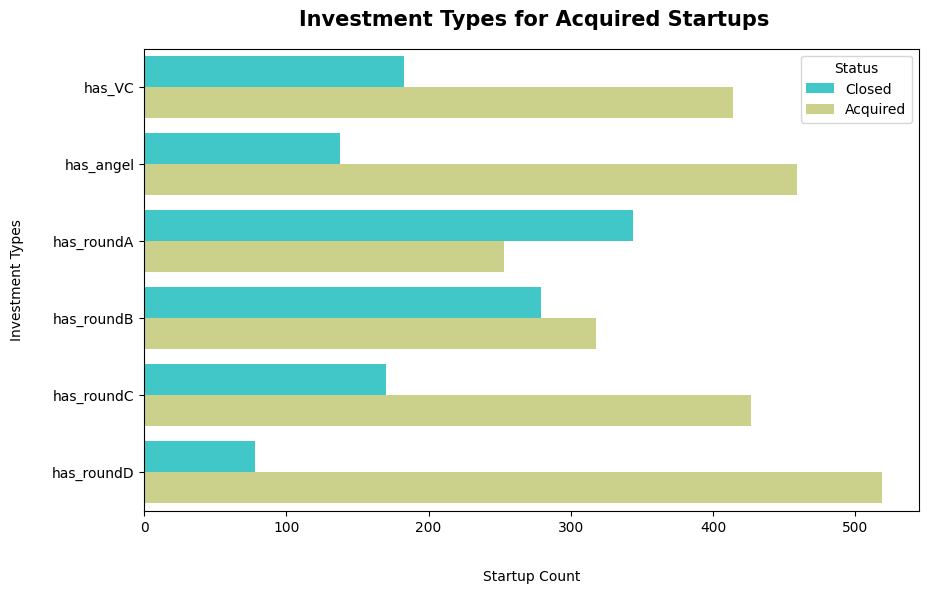

In [143]:
# Filter the DataFrame for entries with a status of 1
d = data_df.loc[data_df['status'] == 1]

# Select only the relevant binary columns
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Melt the DataFrame to long format for use with countplot
melted_f = pd.melt(f)

# Map the binary values to strings
melted_f['value'] = melted_f['value'].map({1: 'acquired', 0: 'closed'})

# Create the countplot with horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=melted_f, y='variable', hue='value', orient='h', palette="rainbow")

# Update the y-axis label with adjusted position
ax.set_ylabel("Investment Types", labelpad=20)  # Adjust labelpad for position
ax.set_xlabel("Startup Count", fontsize=10, labelpad=25)

# Create the title manually and adjust its position
ax.text(0.2, 1.05, "Investment Types for Acquired Startups", fontsize=15, transform=ax.transAxes, fontweight='bold')  # Adjust the x and y values

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Closed', 'Acquired'], title='Status')

plt.show()

It shows that the majority of startups that received round D funding were acquired rather than closed. 

Investments from venture capital (VC) and rounds A, B, and C are more commonly associated with startups that were acquired, suggesting these types of investments might be linked to a higher likelihood of success.

Now that we have confirm the importance of type of invesment is a factor for a startup to succed or not, let's analyse another variable that was highly correlated with our target ("funding").

 ##### **What is the average total funding for startups that successfully get acquired VS those that close?**

In [144]:
# Define a list of pastel color codes
colors = ['#1f77b4', '#d62728']

# Filter out extreme outliers from the data
max_value = data_df['funding_total_usd'].quantile(0.99)  # Define a threshold (e.g., 99th percentile)
filtered_data = data_df[data_df['funding_total_usd'] < max_value]

# Create a histogram with the filtered data
fig = px.histogram(data_frame=filtered_data, x='funding_total_usd', color='status',
                   labels={'funding_total_usd': 'Total Funding (USD in Millions)'},
                   color_discrete_sequence=colors)  
                   
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Total Funding : Acquired vs Closed Startups',
        'y': 0.95,  # You can adjust this for vertical position
        'x': 0.5,  # You can adjust this for horizontal position
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,
            'color': 'black',  # You can change the color if you want
            'family': 'Arial, sans-serif', # You can change the font family if you want
        },
    },
    xaxis_title='Total Funding (USD in Millions)',
    yaxis_title='Frequency',
)
# Format the x-axis tick labels to display values in millions
fig.update_xaxes(tickformat=".2s", exponentformat="none")

# Show the figure
fig.show()


/Users/gabrielaarzate/.virtualenvs/startup/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Most startups, whether acquired or closed, tend to have lower levels of total funding, with the likelihood of either acquisition or closure diminishing as funding amounts increase. 

This might imply that while sufficient funding is necessary for a startup's success, it is not the only determining factor, and there is a threshold beyond which more funding does not necessarily equate to greater chances of success.

####  **Conclusion**

In the pursuit of predicting the success of a startup, it becomes evident that several key factors stand out. The number of business relationships and milestones achieved, alongside the historical record of funding, are significant factors to consider.

Data preprocessing played a key role in turning raw information into practical insights. Techniques such as mapping, removing negative values, and carefully addressing outliers were vital in making sure our analysis provided meaningful and accurate information about the underlying patterns.

Visual representations enable us to decode intricate relationships, recognize trends, and identify outliers with ease. Through visualization, data assumes a tangible form, making it more accessible and intuitive for interpretation.

By following this workflow, a data analysis project becomes more manageable, efficient, and produces reliable results that can inform critical decisions in various domains, including startup success prediction.

####  **What is next**

Evaluating ML models and selecting the best-performing one is one of the main activities you do in pre-production. 

Hopefully, with this article, you’ve learned how to properly set up a model validation strategy and then how to choose a metric for your problem. 

You are ready to run a bunch of experiments and see what works. 

With that comes another problem of keeping track of experiment parameters, datasets used, configs, and results. 

And figuring out how to visualize and compare all of those models and results. 

For that, you may want to check out: